In [1]:
## 异常检测——GEDS算法

D:\software\anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


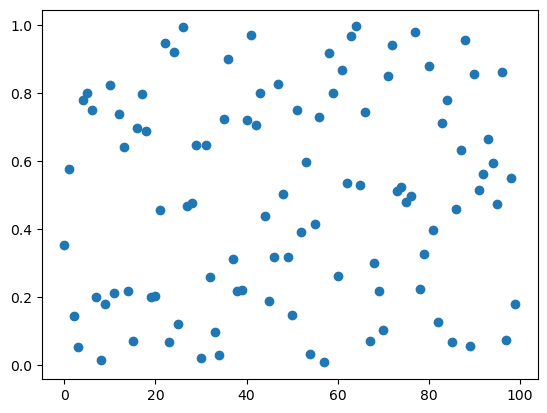

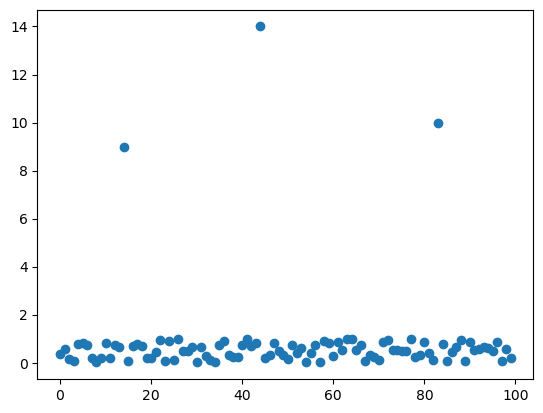

Statistic Value (R1): 7.11110548424213
Critical Value (λ1): 3.384082902288351
14.0 is a outlier. R1 > λ1 :7.11110548424213 > 3.384082902288351
 
Statistic Value (R2): 7.149759548811887
Critical Value (λ2): 3.380650508067058
10.0 is a outlier. R2 > λ2 :7.149759548811887 > 3.380650508067058
 
Statistic Value (R3): 9.28643561934683
Critical Value (λ3): 3.377175980782947
9.0 is a outlier. R3 > λ3 :9.28643561934683 > 3.377175980782947
 
Statistic Value (R4): 1.6434547336120746
Critical Value (λ4): 3.3736583400522497
0.9960897784194438 is not a outlier. R4 < λ4 :1.6434547336120746 < 3.3736583400522497
 
Statistic Value (R5): 1.6690330852289346
Critical Value (λ5): 3.370096570986626
0.9940751255506501 is not a outlier. R5 < λ5 :1.6690330852289346 < 3.370096570986626
 
Statistic Value (R6): 1.6594477072652138
Critical Value (λ6): 3.3664896240676505
0.9811214851666359 is not a outlier. R6 < λ6 :1.6594477072652138 < 3.3664896240676505
 
Statistic Value (R7): 1.6548808363080194
Critical Value (λ7

,i,Ri,λi
1,1,7.111105,3.384083
2,2,7.149760,3.380651
3,3,9.286436,3.377176
4,4,1.643455,3.373658
5,5,1.669033,3.370097
6,6,1.659448,3.366490
7,7,1.654881,3.362836


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats

%matplotlib inline
y = np.random.random(100)
x = np.arange(len(y))

plt.scatter(x, y)
plt.show()

#加入异常值
y[14] = 9
y[83] = 10
y[44] = 14
plt.scatter(x, y)
plt.show()
    
#构造统计量
def t_stats(y, itertation):
    std_dev = np.std(y)
    mean = np.mean(y)
    abs_value = abs(y-mean)
    max_abs_value = max(abs_value)
    max_ind = np.argmax(abs_value)
    statistic = max_abs_value/std_dev
    print("Statistic Value (R{}): {}".format(itertation, statistic))
    return statistic, max_ind
    
    
#计算临界值
def get_critical_value(size, alpha, itertation):
    t_dist = stats.t.ppf(1-alpha/(2*size), size-2)
    numerator = (size-1)*np.sqrt(np.square(t_dist))
    denominator = np.sqrt(size)*np.sqrt(size-2+np.square(t_dist))
    critical_value = numerator/denominator
    print("Critical Value (λ{}): {}".format(itertation, critical_value))
    return critical_value
    
#判定条件

def check_values(stats, critical, input_series, max_ind, iterations):
    if stats >= critical:
        print("{} is a outlier. R{} > λ{} :{} > {}".format(input_series[max_ind], iterations, iterations, stats, critical))
    else:
        print("{} is not a outlier. R{} < λ{} :{} < {}".format(input_series[max_ind], iterations, iterations, stats, critical))
    
def ESD_Test(input_series, alpha, max_outliers):
    stats = []
    critical_vals = []
    for iterations in range (1, max_outliers +1) :
        stat, max_index = t_stats(input_series, iterations)
        critical = get_critical_value(len(input_series), alpha, iterations)
        check_values(stat, critical, input_series, max_index, iterations)
        input_series = np.delete(input_series, max_index)
        critical_vals.append(critical)
        stats.append(stat)
        if stat > critical:
            max_i = iterations
        print(" ")
    print ('HO: there are no outliers in the data')
    print('Ha: there are up to 10 outliers in the data')
    print ("")
    print('Significance level: α={} '.format(alpha))
    print('Critical region: Reject H0 if Ri > critical value')
    print ('Ri: Test statistic')
    print ("λi : Critical Value")
    print("")
    df =  pd.DataFrame({'i':range(1, max_outliers + 1), 'Ri':stats, 'λi':critical_vals})
    def highlight_max (x) :
        if x.i == max_i:
            return ['background-color: yellow']*3
        else:
            return ['background-color: white']*3
    df.index = df.index +1
    print ('Number of outliers {} '.format(max_i))
    return df.style.apply(highlight_max, axis=1)

ESD_Test(y, 0.05, 7)